In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
# Initialising the CNN
classifier = Sequential()

# CNN - 1
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Adding a second convolutional layer ( CNN - 2)
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening Layer 
classifier.add(Flatten())

# Step 4 - Full connection  ( Neural Netwokr)
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [4]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [6]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\RoshanSalunke\Desktop\Artificial Intelligence -- Neural Network\CNN-IMAGE\CAT&DOG (1)\dataset\training_set",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r"C:\Users\RoshanSalunke\Desktop\Artificial Intelligence -- Neural Network\CNN-IMAGE\CAT&DOG (1)\dataset\test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
8000/32  # each group will have 250 image unique

250.0

In [8]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
import warnings 
warnings.filterwarnings("ignore")

In [10]:
result=classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/8
250/250 [==============================] - 60s 230ms/step - loss: 0.6896 - accuracy: 0.5393 - val_loss: 0.6767 - val_accuracy: 0.6135
Epoch 2/8
250/250 [==============================] - 47s 187ms/step - loss: 0.6642 - accuracy: 0.6014 - val_loss: 0.6479 - val_accuracy: 0.6225
Epoch 3/8
250/250 [==============================] - 52s 209ms/step - loss: 0.6368 - accuracy: 0.6326 - val_loss: 0.6384 - val_accuracy: 0.6365
Epoch 4/8
250/250 [==============================] - 49s 195ms/step - loss: 0.6157 - accuracy: 0.6595 - val_loss: 0.6248 - val_accuracy: 0.6495
Epoch 5/8
250/250 [==============================] - 48s 191ms/step - loss: 0.5912 - accuracy: 0.6845 - val_loss: 0.6391 - val_accuracy: 0.6440
Epoch 6/8
250/250 [==============================] - 47s 186ms/step - loss: 0.5724 - accuracy: 0.6946 - val_loss: 0.6253 - val_accuracy: 0.6585
Epoch 7/8
250/250 [==============================] - 47s 188ms/step - loss: 0.5497 - accuracy: 0.7159 - val_loss: 0.6371 - val_accuracy:

In [11]:
classifier.save('cat_dog_classifier.h5')

!pip install opencv-python-headless==4.5.2.52

In [12]:
from tensorflow.keras.preprocessing import image

In [13]:
from  keras.models import load_model
#from keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
model=load_model("cat_dog_classifier.h5")

In [13]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))  # data import 7 convert image into height= 64 , width = 64 
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if Probability > 0.5:
        print("its a dog")
    else:
        print("its a cat")

In [6]:
import os 
os.chdir(r"C:\Users\RoshanSalunke\Desktop\Artificial Intelligence -- Neural Network\CNN-IMAGE")

1/1 [==============================] - 0s 134ms/step
Probability 0.3437995
its a cat


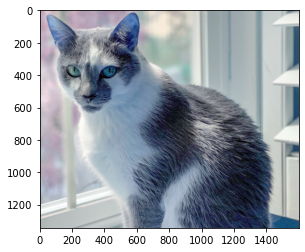

In [14]:
model_output("demo6.jpg")

1/1 [==============================] - 0s 20ms/step
Probability 0.7337187
its a dog


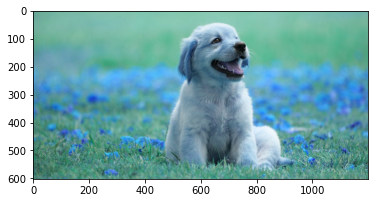

In [15]:
model_output("demo2.jpg")

1/1 [==============================] - 0s 16ms/step
Probability 0.8147864
its a dog


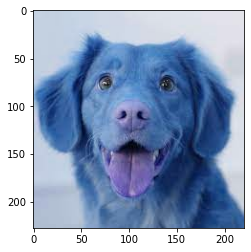

In [16]:
model_output("demo16.jpg")

1/1 [==============================] - 0s 16ms/step
Probability 0.7048693
its a dog


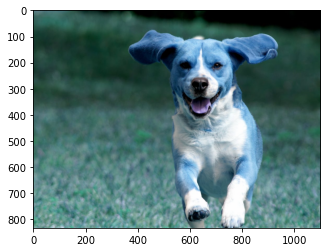

In [17]:
model_output("demo1.jpg")

1/1 [==============================] - 0s 19ms/step
Probability 0.1645294
its a cat


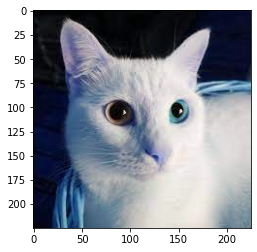

In [18]:
model_output("demo12.jpg")

1/1 [==============================] - 0s 15ms/step
Probability 0.19445673
its a cat


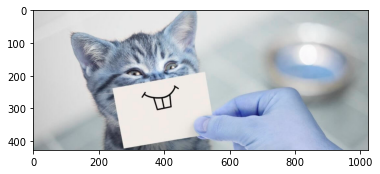

In [19]:
model_output("demo13.jpg")

1/1 [==============================] - 0s 16ms/step
Probability 0.6916781
its a dog


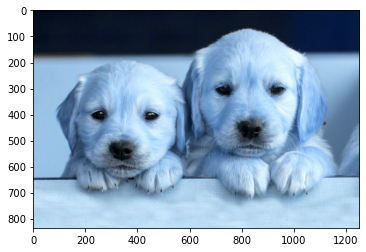

In [20]:
model_output("demo15.jpg")

## Conclusion

In this project, we developed a Convolutional Neural Network (CNN) model for Dog and Cat image classification. The model was trained on a large dataset of images and achieved an accuracy of 72% on the test set.

This project demonstrates the effectiveness of CNN models for image classification tasks, and highlights the importance of careful model selection and hyperparameter tuning. With further refinement, this model could have valuable applications in areas such as animal welfare, veterinary medicine, and biometric security.